In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5 already installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_portada.jpg" align="center" width="70%"/></div>
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 4</div>
            <div class="div-contenido">Evaluación de Modelos en Problemas de Clasificación</div>
            <div class="div-contenido">Grid Search - Random Search</div>
        </div>
    </div>
</div>

### Agenda

---

- Métricas de evaluación de modelos de clasificación

- Curva ROC y AUC (Area bajo la curva)

- GridSearch y RandomSearch: estrategias para definir hiperparámetros


### Introducción

---

¿Cómo evaluamos los modelos supervisados de machine learning?

- Con las **regresiones** el valor a predecir es una *variable continua*. Ya analizamos métricas para evaluarlas.

- En los problemas de **clasificación**, el objetivo es **predecir la pertenencia o la probabilidad de pertenencia** de un caso a una clase. 

Estudiaremos *distintas métricas* para *evaluar la performance de un clasificador*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_regression_vs_classification.png" alt="Regresion vs Classification" width=45% height=25% />

### Outcomes

---

- *Outcomes:* declaraciones específicas y mensurables que permiten saber si alcanzó los objetivos.

Los outcomes en *una clasificación* y *en función de la tasa de acierto* se pueden dividir en cuatro clases **(TP, TN, FP, FN)**. 

Las cuatro clases son:

- **Verdaderos positivos (TP):** es una clase positiva clasificada correctamente. 

- **Verdaderos negativos (TN):** es una clase negativa clasificada correctamente.

- **Falsos positivos (FP):** es una clase negativa que fue clasificada como positiva.

- **Falsos negativos (FN):** es una clase positiva que fue clasificada como negativa.

Ejemplo: un modelo que determina si un individuo *pertenece o no a la clase “enfermo” = 1*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_matriz_confusion_ejemplo.PNG" alt="matriz confusion" width=60% height=40% />

Definimos *positivo* al valor 1 del estimador $\hat{y}$. 

En este ejemplo, positivo es $\hat{y} = 1$, que equivale a enfermo.

<div id="caja7" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <br>  
  <div style="float:left;width: 85%;"><label>En este ejemplo, que es más importante? <b>Evitar los FP o los FN?</b></label></div>
<br>

### Matriz de confusión

---

La matriz anterior se llama **Matriz de confusión**.

Es una **tabla de doble entrada** donde se describen *los resultados reales* vs. *resultados predichos* .

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_matriz_confusion.png" alt="matriz confusion" width=60% height=40% />


<div class="div-dhds-fondo-1"> Dataset 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

###  Dataset

---
Para ejemplificar los conceptos, usamos un conjunto de abulones, una especie de moluscos, llamados también orejas de mar.

Pueden consultar detalles del dataset <a href="https://archive.ics.uci.edu/ml/datasets/Abalone" target="_blank">aquí</a>.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_abadone.jpg" alt="abadone" width=45% height=25% />

Dadas ciertas características del animal, se intenta predecir la edad. 

En nuestro caso, queremos clasificarlos con *una clase binaria que indica si es adulto* (0 = no adulto, 1 = adulto).

In [2]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/abalone.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])
df.sample(3)

Filas: 3676 Columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
1731,F,0.665,0.505,0.160,12.9150,0.6310,0.2925,0.3200,11,0
2390,F,0.455,0.350,0.125,0.4485,0.1585,0.1020,0.1335,16,1
3082,F,0.755,0.575,0.200,2.0730,10.1350,0.4655,0.4800,11,1


Armamos la matriz de features ($X$) y el target ($y$)

In [4]:
X = df.drop(['Adulto','Sex'], axis=1)
y = df['Adulto']

In [5]:
print('Total por labels: \n', y.groupby(y).count())

Total por labels: 
 Adulto
0    2073
1    1603
Name: Adulto, dtype: int64


Creamos el modelo KNN con 9 vecinos.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

In [7]:
# Generamos los datasets de train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=56)

# Ajustamos a los datos de entrenamiento.
knn.fit(X_train, y_train);

# Predecimos etiquetas para los datos de test.
y_pred = knn.predict(X_test)

Ahora si! A evaluarlo con distintas métricas

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_homero.jpg" alt="abadone" width=45% height=25% align="center"/>

<div class="div-dhds-fondo-1"> Métricas 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

###  Métricas

---

A partir de la **Matriz de confusión** podemos derivar **distintas métricas** para evaluar los modelos de clasificación.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_metrics.png" alt="Drawing" style="width: 500px;"/>

### Matriz de confusión

---

Veamos cómo se calcula con *scikit-learn*.


Usando el dataset de test, usamos **y_test** que son los valores target reales, y los comparamos con **y_pred** que son los valores target predichos.

In [8]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[573  72]
 [ 43 415]]


Y podemos calcular:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_matriz_confusion.png" alt="matriz confusion" width=60% height=40% />

* **True Positives (TP):** adultos predichos correctamente (clase positiva, 1) **(415)**

* **True Negatives (TN):** no adultos predichos correctamente (clase negativa, 0) **(573)**

* **False Positives (FP):** no adultos predichos adultos **(72)**

* **False Negatives (FN):** adultos predichos no adultos **(43)**

In [9]:
TP = confusion[1, 1]; TN = confusion[0, 0] ; FP = confusion[0, 1] ; FN = confusion[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

TP:  415  TN:  573  FP:  72  FN:  43


### Accuracy

---

- Accuracy es la **proporción de clases correctamente predichas**.


<p style="font-size=24px;">
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$
</p>


**Definición:** `Accuracy` se calcula como la proporción de casos correctamente clasificados de los datos de **test** sobre el total de casos de **test**.


**Documentación:** [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

Para calcularlo importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función `accuracy_score`.

In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy=', accuracy_score(y_test, y_pred))

Accuracy= 0.8957388939256573


Podemos calcularlo también usando la fórmula:

In [11]:
print('Accuracy=', (TP+TN)/ (TP+TN+FP+FN))
print('Total de casos correctamente predichos (TP+TN) =',(TP+TN))
print('Total de casos (TP+TN+FP+FN) =',(TP+TN+FP+FN))

Accuracy= 0.8957388939256573
Total de casos correctamente predichos (TP+TN) = 988
Total de casos (TP+TN+FP+FN) = 1103


### Accuracy

---

**¿Qué significa?** : que encontramos el **89% (aprox.)** de los casos —en el **test set**— correctamente clasificados.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_accuracy_cuadro.png" alt="accuracy_cuadro" width=60% height=40% />

- Un inconveniente: **accuracy** hace foco tanto en la detección correcta de **TP** (casos positivos) como de **TN** (casos negativos). 

    Pero quizás *solo* necesitemos enfocarnos en la detección de los **TP** y no de los **TN**. Y esta métrica no detecta si *no tengo casos positivos no predichos*.

- En ciertos problemas, el número de clases positivas es bajo. Los llamamos problemas de **clases desbalanceadas**, donde hay que evitar que los modelos predigan todas las instancias como pertenecientes a la clase mayoritaria.

    Un problema típico es la detección de default financiero (pocas personas con créditos terminan no pagando sus cuotas... ponele).

### Recall (Sensitivity)

---

- Recall (Sensibilidad o True Positive Rate) es la **proporción de positivos correctamente predichos**.

<p style="font-size=24px;">
$$Recall \space (Sensitivity) = \frac{TP}{TP + FN}$$</p>

**Definición:** `Recall` mide la capacidad del modelo de detectar los **verdaderos positivos (TP)** sobre **todos los casos que son positivos (TP+FN)**. Qué tan "sensible" es.

**Documentación:** [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html).

Para calcularlo, importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función `recall_score`.

In [12]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.9061135371179039


Podemos calcularlo también usando la fórmula:

In [13]:
print('Recall=', (TP)/ (TP+FN))
print('Total de casos positivos predichos correctamente (TP) =',(TP))
print('Total de casos positivos reales (TP+FN) =',(TP+FN))

Recall= 0.9061135371179039
Total de casos positivos predichos correctamente (TP) = 415
Total de casos positivos reales (TP+FN) = 458


### Recall

---

**¿Qué significa?** : que encontramos el **90% (aprox.)** de los casos positivos — en el **test set**— correctamente clasificados.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_recall_cuadro.png" alt="recall_cuadro" width=60% height=40% />

- Si su valor es bajo, es porque hay presencia de **falsos negativos**. Por eso, esta medida es sensible a los FN.

- Comparado con **accuracy_score**, esta medida se enfoca en los casos positivos, así muestra cómo funciona nuestro modelo en relación al objeto de interés  de nuestro negocio.

- Útil cuando la ocurrencia de **falsos negativos** es inaceptables. En nuestro ejemplo, no podemos permitir que un adultos sea clasificado como no-adulto. 

### Precision

---

- Precision o *positive predictive value (PPV)* es la **proporción de positivos correctamente predichos sobre el total de predicciones positivas.**

<p style="font-size=24px;">
$$Precision = \frac{TP}{TP + FP}$$</p>

**Definición:** `Precision` mide qué tan **"preciso"** es el clasificador al predecir las instancias positivas. Se calcula como el número de **verdaderos positivos (TP)** sobre **todos los casos que son predichos positivos (TP+FP)**.

**Documentación:** [`precision_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

Para calcularlo, importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función `precision_score`.

In [14]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.8521560574948666


Podemos calcularlo también usando la fórmula:

In [15]:
print('Recall=', (TP)/ (TP+FP))
print('Total de casos positivos predichos correctamente (TP) =',(TP))
print('Total de casos positivos predichos (TP+FP) =',(TP+FP))

Recall= 0.8521560574948666
Total de casos positivos predichos correctamente (TP) = 415
Total de casos positivos predichos (TP+FP) = 487


### Precision

---

**¿Qué significa?** : que encontramos el **85% (aprox.)** de los casos **predichos** positivos,  correctamente clasificados.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_precision_cuadro.png" alt="precision_cuadro" width=60% height=40% />

- Si su valor es bajo, es porque hay presencia de **falsos positivos**. Por eso, esta medida es sensible a los FP.

- Util cuando necesitamos estar seguros de los **verdaderos positivos**. Por ejemplo, confiar que un mail predicho como spam lo es.

<br>
<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Tener en cuenta la diferencia entre <b>recall</b> y <b>precisión</b>. Ambos están pesando los <b>verdaderos positivos (TP)</b>; con <b>recall</b> respecto a los positivos reales; con <b>precisión</b>, respecto a los positivos predichos.

### Specificity

---

- Specificity *(especificidad o true negative rate (TNR))* es la **proporción de negativos correctamente predichos sobre el total de casos negativos.**


<p style="font-size=24px;">
$$Specificity = \frac{TN}{TN + FP}$$</p>

**Definición:** *specificity* mide qué tan **"específico"** es el clasificador al predecir las instancias positivas. Se calcula como el número de **verdaderos negativos (TN)** sobre **todos los casos que son negativos (TN+FP)**.

Solo podemos calcularla usando la fórmula:

In [16]:
print('Specificity=', (TN)/ (TN+FP))
print('Total de casos negativos predichos correctamente (TN) =',(TN))
print('Total de casos negativos (TN+FP) =',(TN+FP))

Specificity= 0.8883720930232558
Total de casos negativos predichos correctamente (TN) = 573
Total de casos negativos (TN+FP) = 645


### Specificity

---

**¿Qué significa?** : que encontramos el **88% (aprox.)** de los casos negativos,  correctamente clasificados.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_specificity_cuadro.png" alt="specificity_cuadro" width=60% height=40% />

- Si su valor es bajo, es porque hay presencia de **falsos positivos**. Por eso, esta medida es sensible a los FP.

- Un modelo muy específico, indica pocos errores de falsos positivos. En nuestro modelo, pocas veces dijo que un abalón es adulto, cuando en realidad no lo es.

- Otro ejemplo donde importa una alta especificidad, es si predecimos que una persona está enferma al cual debemos suministrarle una droga potente, y no lo está realmente. 

### Comparación de métricas

---

- Debemos tener en cuenta **Recall** cuando no podemos aceptar los *falsos negativos*.

- **Specificity** cuando no debemos aceptar *falsos positivos*.

- **Precision** cuando debemos estar seguros de los *verdaderos positivos*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_comparacion.png" alt="comparacion" width=50% height=30% />

### F1-Score

---

- F1-Score es la media armónica entre *Recall* y *Precisión*.


<p style="font-size=24px;">
$$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = \frac{2 * precision * recall}{precision + recall}$$
</p>

Como regla general, cuanto mayor es esta métrica, mejor es el modelo.

Pero para tener un `f1-score` alto, es necesario que tanto **recall** como **precision** sean altos, mientras que un `f1-score` bajo puede ser el resultado de un valor bajo en por lo menos una de estas métricas o en ambas a la vez.

**Documentación:** [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

Para calcularlo, importamos del módulo [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) la función `f1_score`.

In [17]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.8783068783068783


### F1-Score

---

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_F1_cuadro.jpg" alt="specificity_cuadro" width=40% height=30% />

- La ventaja de usar la media armónica (en vez de la media aritmética) es que el resultado del f1-score no es sensible a valores altos de una de las dos variables (**recall** o **precision**). 

- Por otro lado, no todos los valores extremos son ignorados, ya que los que son muy bajos si tienen peso en el resultado final.

<div class="div-dhds-fondo-1"> Umbrales (thresholds)
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Umbrales (thresholds)

---
Cuando realizamos las predicciones, por cada observación asignamos *un valor de la clase*.

Las predicciones se encuentran en *y_pred*, donde el valor 0 indica que no es adulto, 1 que sí lo es. 

In [18]:
pd.Series(y_pred).value_counts()

0    616
1    487
dtype: int64

También podemos predecir un **valor de probabilidad de pertenencia a una clase**. 

En lugar de usar los valores 0 y 1, *tomamos valores que van desde 0 hasta 1*. 

**Más cerca de 0** , más probable que pertenezca a la **clase negativa**; **más cerca de 1** indica que probablemente sea de **clase positiva**. 

Para acceder a estos valores de probabilidad, usamos el método [`.predict_proba()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) del modelo. 

In [19]:
y_pred_proba = knn.predict_proba(X_test)

- El método `.predict_proba()` devuelve un array con dos probabilidades para cada instancia del test set: $p(y=0)$ y $p(y=1)$, en ese orden.

- La primera columna es la probabilidad de pertenecer a la clase 0 (negativa), y la segunda columna a la clase 1 (positiva). 

In [20]:
y_pred_proba[5:9]

array([[0.11111111, 0.88888889],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

### Umbrales (thresholds)

---
El método `.predict`, asume que **si $p(y=1) > 0.5$, entonces, la predicción del modelo será $y=1$**.

Al *valor 0.5* lo llamamos **umbral (threshold)**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_threshold_05.png" alt="threshold_05" width=60% height=40% />



In [21]:
# Pertenencia a partir de las probabilidades
pd.Series(y_pred_proba[:,1]>0.5).astype(int).value_counts()

0    616
1    487
dtype: int64

- Es igual a lo predicho con el método `.predict`.

In [22]:
# Pertenencia calculada a partir del método .predict()
pd.Series(y_pred).value_counts()

0    616
1    487
dtype: int64

### Modificando el umbral

---
Podemos **modificar el umbral** asignando un valor menor o mayor al default (0.5), que esté entre 0 y 1. (Recordemos que es una probabilidad!)

Por ejemplo, si queremos una definición menos rigurosa de adulto usamos un umbral menor, 0.3, para incorporar más casos como adulto.

Estamos corriendo el umbral hacia la izquierda.

Tenemos dos opciones para hacer las transformaciones con distintos thresholds. 

- Utilizar la función `binarize` del módulo *preprocessing de sklearn*.

- Generar un booleano y pasarlo a int.

In [23]:
from sklearn.preprocessing import binarize
y_pred_03 = binarize(y_pred_proba, threshold=0.3)[:,1]

In [24]:
y_pred_03 = (y_pred_proba[:,1] > 0.3).astype(int)

### Modificando el umbral

---
Comparemos las métricas entre el valor de umbral original 0.5 y el nuevo 0.3.

In [25]:
print('Matrix Original')
display(confusion_matrix(y_test,y_pred))
print('')
print('Nueva Matrix')
display(confusion_matrix(y_test,y_pred_03))

Matrix Original


array([[573,  72],
       [ 43, 415]])


Nueva Matrix


array([[546,  99],
       [ 35, 423]])

- Observemos que efectivamente *los casos positivos correctamente clasificados (TP)* pasaron de 415 a 423.

- Y bajaron *los casos negativos correctamente clasificados (TN)*.

- Crecieron los *falsos positivos (FP)*, de 72 a 99.

- Y bajaron *los falsos negativos (FN)*.

Podemos deducir que logramos aumentar el número de adultos predichos correctamente. 

Pero con el costo de subir los errores de falsos positivos, lo que es lógico, ya que al bajar el umbral incorporamos más casos predichos como positivos, y en realidad son negativos.

### Comparando métricas

---
Veamos las métricas en ambos casos:

**Accuracy**

In [26]:
print('Acc umbral 0.5 =', accuracy_score(y_test, y_pred))
print('Acc umbral 0.3 =', accuracy_score(y_test, y_pred_03))

Acc umbral 0.5 = 0.8957388939256573
Acc umbral 0.3 = 0.8785131459655485


**Recall**

In [27]:
print('Recall umbral 0.5=', recall_score(y_test, y_pred))
print('Recall umbral 0.3=', recall_score(y_test, y_pred_03))

Recall umbral 0.5= 0.9061135371179039
Recall umbral 0.3= 0.9235807860262009


**Precision**

In [28]:
print('Precision umbral 0.5=', precision_score(y_test, y_pred))
print('Precision umbral 0.3=', precision_score(y_test, y_pred_03))

Precision umbral 0.5= 0.8521560574948666
Precision umbral 0.3= 0.8103448275862069


**Specificity**

In [29]:
# definimos la función que va a tomar como argumentos los valores reales y los predichos
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sp = tn / (tn+fp)
    return(sp)

print('Spec umbral 0.5 =', specificity(y_test, y_pred))
print('Spec umbral 0.3 =', specificity(y_test, y_pred_03))

Spec umbral 0.5 = 0.8883720930232558
Spec umbral 0.3 = 0.8465116279069768


### Comparando métricas

---

Al disminuir el valor del umbral aumenta la cantidad de predichos positivos. Entonces:

- Puede aumentar la cantidad de **True Positives**, y por lo tanto también **Recall**. El clasificador es más **"sensible"** a las instancias positivas.

- También puede aumentar la cantidad de **Falsos Positivos**, generando un peor indicador para **Specificity** y también **Precision**.

- **Sensitivity** y **Specificity** tiene una relación inversa: siempre al mejorar uno, empeora el otro.

**¿Análogamente, qué pasa al aumentar el valor del umbral?**

**¿Cuando nos sirve modificar los umbrales?** 


**Vamos a intentar encontrar un valor del umbral que maximice la cantidad de verdaderos positivos y verdaderos negativos, y minimice la cantidad de falsos positivos y falsos negativos.**

Dependiendo del problema vamos a estar más interesados en mejorar la detección de positivos, o de negativos.

<div class="div-dhds-fondo-1"> Curva ROC y AUC (Area bajo la curva)
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Curva ROC

---
La **Curva ROC** evalua la relación entre **specificity** (o su inversa $1-FPR$, tasa de falsos negativos) y **sensitivity o recall** (o también llamada $TPR$, tasa de verdaderos positivos). 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_general.png" alt="Drawing" style="width: 500px;"/>

### Curva ROC

---
La clave es estimar **specificity** y **sensitivity** de un modelo para distintos **umbrales de decisión**.

Veamos un ejemplo. Consideremos **specificity** y **sensitivity** para cuatro matrices de confusión distintas resultado de elegir 4 **umbrales de decisión**.

De más exigente a menos exigente, los umbrales son: *umbral 1 = 1, umbral 2 = 0.75, umbral 3 = 0.50 y , umbral 4 = 0*. 

**Umbral 1** es el más restrictivo, pues indica que un caso es considerado positivo si su valor de probabilidad es mayor a 1. Esto es muy poco frecuente, entonces todos los casos son clasificados como negativos, y por lo tanto **specificity** es el máximo. 

Por el contrario, **Umbral 4** es el menos restrictivo, considerando casos positivos a todos los que tienen probabilidad mayor o igual a 0. Entonces todos los casos son predichos como positivos, llevando el **recall o sensitivity** a 1. 

La tabla para este modelo imaginario es: 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_2.JPG" alt="Drawing" style="width: 500px;"/>

A medida que aumentamos el umbral y nos volvemos más flexibles ganamos **sensitivity** pero perdemos **specificity**. 

### Curva ROC

---
Con la información de la tabla podemos armar el plot de la **Curva ROC**. 

El **eje y** corresponde a la **sensitivity** de cada umbral, y el **eje x** corresponde a la **FPR** o (**1-specificity**) de cada umbral (se usa la inversa de **specificity** para que los dos ejes del gráfico aumenten en forma positiva). 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_3.png" alt="Drawing" style="width: 300px;"/>

### Curva ROC

---

**¿Cómo interpretamos la Curva ROC?** Veamos distintos ejemplos.

Modelo **random**. Significa que *los True positivos (TP)* **son iguales** a *los falsos positivos (FP)* para todos los umbrales. Es como tirar una moneda para predecir si es positivo o no. 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_4.png" alt="Drawing" style="width: 300px;"/> 

El modelo **perfecto** es cuando tiene el  máximo de **sensitivitiy** y el máximo de **specificity**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_5.png" alt="Drawing" style="width: 300px;"/>

Los modelos que son **"buenos"** suelen estar entre la línea del **random** y del **perfect**. 

### Curva ROC

---
La **Curva ROC** permite visualmente comparar la performance de dos modelos usando dos medidas claves: *sensitivity* y *specificity*. 

El modelo más cercano a la curva **perfecta** es mejor que aquellos más cercanos a la línea **random**.

En el siguiente gráfico A es mejor que B:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_6.png" alt="Drawing" style="width: 300px;"/>

### AUC

---

La *Curva ROC* nos permite estimar el **Area bajo la curva (AUC por sus siglas en inglés, Area under the curve)**. 

El **AUC** resume en una sóla métrica la relación que muestra el gráfico entre **sensitivity** y **specificity**.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_7.png" alt="Drawing" style="width: 300px;"/>

**Importante:** Dos modelos pueden tener un mismo **AUC** pero ser distintos al visualizar su *Curva ROC*:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_roc_8.png" alt="Drawing" style="width: 300px;"/>

### Implementación

---

Generemos la **Curva ROC** y el **AUC** en nuestro modelo para clasificar a los moluscos en adultos o no. 

Para la *curva ROC* usamos la función [`.roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) del módulo `metrics` de `sklearn`. 

Esta función calcula para **distintos thresholds**, *FPR (1-specificity)* y *TPR (sensitivity o recall)*. Y con estos valores graficamos la curva.

- En `.roc_curve()` el primer argumento son los **valores observados** y el segundo la **probabilidad de la clase positiva**

- Como **output** nos va a devolver (respetando el orden): **FPR**, **TPR**, **THRESHOLDS**.

**Documentación:** [`.roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

In [30]:
from sklearn.metrics import roc_curve
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_pred_proba[:,1])

Convertimos los valores en un objeto dataframe y graficamos la curva ROC

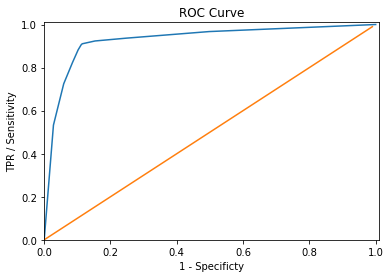

In [31]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

### Implementación

---

Para calcular la **AUC** usamos la función [`.auc()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) del módulo `metrics` de `sklearn`. 

Usa los valores de **TPR** y **FPR** generados en la función `.roc_curve()`

- En `.auc()` el primer argumento corresponde a los valores de **FPR** y el segundo a **TPR**.
- Como **output** nos va a devolver el **AUC**.

**Documentación:** [`.auc()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

In [32]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.9282387190684134


<div class="div-dhds-fondo-1"> Grid Search y Random Search
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Hiperparámetros

---

Los **hiperparámetros** son las características **externas** de un modelo,  *no se "aprenden"*, son valores que tiene que definirse cuando se implementa el modelo, *antes de entrenarlo*.

Un ejemplo es el valor *k* en el algoritmo `KNeighborsClassifier`.

Los **parámetros** son las características **internas** de un modelo, son valores estimados a partir del entrenamiento con los datos. 

Un ejemplo son los *coeficientes* de una regresión lineal.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_hiperparametros.png" alt="hiperparametros" style="width: 500px;"/>

### Hiperparámetros

---

No podemos saber *a priori* cuáles son los mejores valores de los **hiperparámetros** del modelo para resolver un problema determinado. 

Además, mientras una *configuración específica de hiperparámetros* genera una buena performance del modelo para un determinado dataset, en otro similar quizá ya no lo es.

Por lo tanto, la optimización o ajuste de los hiperparámetros, **hyperparameters tuning**, es decir, la selección de un **conjunto óptimo de valores para los hiperparametros** es una parte esencial del machine learning.

Pero los modelos pueden tener *muchos hiperparámetros*, y encontrar la mejor combinación nos lleva a un *problema de búsqueda de información*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_hiperparametros_ejemplo.png" alt="hiperparametros" style="width: 500px;"/>

### Grid Search - Introducción

---

Vamos a analizar dos métodos de *hyperparameters tuning*: **Grid Search** y **Random Search**.

Ambos hacen algo simple; para cada combinación de valores de los hiperparámetros: 
- los aplica sobre el *dataset de train* --> los *evalua con cross validation* --> *registra el score*.

Al final de todas las búsquedas:

- selecciona la combinación con **más alto score** --> aplica sobre **train** --> predice sobre **test**.



<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_grid_random_2.png" alt="Drawing" width="70%" />

`GridSearch` busca la mejor combinación de *hiperparámetros* dentro de una **grilla (grid)** especificada previamente. La búsqueda es **exhaustiva para cada valor de la grilla**.

`RandomSearch` selecciona en forma **aleatoria** un **subset** de los *hiperparámetros*.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M4/CLASE_30_Ev-Modelos_Grid-Search/Presentacion/img/M4_CLASE_30_grid_grid_random_1.png" alt="Drawing" style="width: 500px;"/>

Es importante tener en cuenta el **costo a nivel de cómputo** de evaluar todas las combinaciones de los valores de los hiperparámetros. Por lo tanto, en algunos casos vamos a tener que elegir una **grilla reducida**, o usar **RandomSearch** que selecciona un subset de combinaciones. 

### Grid Search - Implementación

---

Para implementar en `sklearn` una búsqueda sobre **hiperparámetros** tenemos que considerar:

- Un **estimador**, es decir, un modelo sobre el cual queremos trabajar.

- Un **espacio de parámetros** donde vamos a hacer la búsqueda.

- Un **método de busqueda** sobre los modelos candidatos (`RandomSearch`,`GridSearch`).

- Un **esquema de validación cruzada**, seleccionando la cantidad de folds.

- La **métrica de evaluación** para elegir el mejor modelo.


Por ejemplo:

- Un **estimador**, el modelo KNN.

- Un **espacio de parámetros**, el parámetro `n_neighbors` con un rango de valores entre 1 y 30.

- Un **método de busqueda**, `RandomSearch`.

- Un **esquema de validación cruzada**, Cross validation con 10 folds.

- La **métrica de evaluación**, maximizar `accuracy`.


<div class="div-dhds-fondo-1"> Dataset 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

###  Dataset

---
Vamos a aplicar **GridSearch** y **RandomSearch** sobre el dataset de abalones.

In [33]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
df = pd.read_csv('../Data/abalone.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])
df.sample(3)

Filas: 3676 Columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
1677,M,0.615,0.475,0.175,1.224,0.6035,0.2610,0.311,9,0
2173,M,0.595,0.465,0.125,0.799,0.3245,0.2000,0.230,10,1
2686,M,0.630,0.505,0.150,13.165,0.6325,0.2465,0.370,11,1


Armamos la matriz de features ($X$) y el target ($y$)

In [35]:
X = df.drop(['Adulto','Sex'], axis=1)
y = df['Adulto']

Vemos la distribución de los labels de la clase.

In [36]:
print(y.groupby(y).count())

Adulto
0    2073
1    1603
Name: Adulto, dtype: int64


Hacemos el split entre train y test.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=56)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2573, 8) (1103, 8) (2573,) (1103,)


Debemos estandarizar las features, ya que las escalas entre algunas de ellas son distintas.

In [38]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

###  Hiperparámetros de un modelo

---
Podemos conocer todos los hiperparámetros de los modelos con el método `get_params`.

Por ejemplo, veamos los del modelo *KNN, vecinos más cercanos*. 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

###  Prueba manual

---
Antes de usar los métodos `RandomSearch` o `GridSearch` para realizar el *tuning de los hiperparámetros*, es conveniente realizar **manualmente una prueba** con distintos valores para los hiperparámetros a evaluar.

Vamos a calcular el valor de **accuracy** para distintos valores K del hiperparámetro `n_neighbors`, para conocer el valor óptimo.

Recordemos que para la evaluación usamos *cross validation*.

Para hacerlo consideramos el método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), que evalúa los resultados de una métrica en un esquema de validación cruzada. 

En el parámetro `scoring='accuracy'` indicamos la métrica.

Y el parámetro `cv=10` para definir 10 folds, lo reemplazamos usando previamente el método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) que asegura que los 10 folds cuentan con casos seleccionados en forma aleatoria *manteniendo la distribución original de las etiquetas*.

In [40]:
# n_splits = permite determinar la cantidad de folds
# random_state = nos permite definir una semilla para asegura reproducibilidad
# shuffle = nos asegura que las particiones se van a hacer en forma aleatoria
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

Hacemos un *for* para recorrer distintos valores de K, evaluamos los scores de la validación cruzada de los datos de train y guardamos el promedio de los scores.

In [41]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=folds, scoring='accuracy')
    k_scores.append(scores.mean())

En la lista `k_scores` encontramos los valores promedio de **accuracy** para los distintos valores de **k**.

In [42]:
for i, value in enumerate(k_scores):
     print('K=', i+1,':','%.4f'%value,'||',end=' ',sep='')

K=1:0.8492|| K=2:0.8496|| K=3:0.8838|| K=4:0.8768|| K=5:0.8900|| K=6:0.8885|| K=7:0.8920|| K=8:0.8912|| K=9:0.8947|| K=10:0.8935|| K=11:0.8920|| K=12:0.8920|| K=13:0.8966|| K=14:0.8908|| K=15:0.8935|| K=16:0.8892|| K=17:0.8947|| K=18:0.8923|| K=19:0.8951|| K=20:0.8939|| K=21:0.8927|| K=22:0.8916|| K=23:0.8927|| K=24:0.8923|| K=25:0.8951|| K=26:0.8927|| K=27:0.8920|| K=28:0.8900|| K=29:0.8912|| K=30:0.8888|| 

Grafiquemos estos resultados.

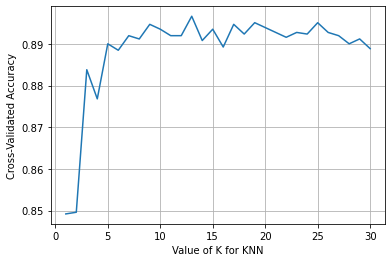

In [43]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

Confirmamos que el **k** óptimo es 13 con un score de validación de 0.8966.

### Grid Search - Implementación

---

Ahora trabajemos con el método `GridSearchCV` que básicamente va a implementar en forma automática la búsqueda y analisis de los hiperparámetros que realizamos en forma manual.


Recordemos que para implementar en `sklearn` una búsqueda sobre **hiperparámetros** tenemos que considerar:

- Un **estimador**, es decir, un modelo sobre el cual queremos trabajar.

- Un **espacio de parámetros** donde vamos a hacer la búsqueda.

- Un **método de busqueda** sobre los modelos candidatos (`RandomSearch`,`GridSearch`).

- Un **esquema de validación cruzada**, seleccionando la cantidad de folds.

- Una **métrica de evaluación** para elegir el mejor modelo.


`GridSearchCV` lo implementa en sus parámetros:
- **estimator =** Modelo instanciado.
- **param_grid=** Grilla de parametros para recorrer. Un diccionario cuyas claves son pares (nombre hiperparámetro, lista de valores).
- **cv=** Cantidad de folds para la validación cruzada.
- **scoring=** Métrica usada para evaluar. 

Y uno opcional, pero importante porque las búsquedas exhaustivas pueden consumir mucha CPU: 
- **n_jobs=** Número de procesadores que corren en paralelo.

### Grid Search - Implementación

---

Avancemos con la implementación.

In [44]:
from sklearn.model_selection import GridSearchCV

**Estimador**: el modelo instanciado.

In [45]:
knn = KNeighborsClassifier()

**Espacio de parámetros:** grilla de parámetros que queremos testear. Diccionario con las claves *nombre=rango de valores*.

In [46]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


**Esquema de validación cruzada:** definimos la cantidad de folds, con el método `StratifiedKFold`

In [47]:
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

**Método de busqueda:** GridSearchCV.

**Métrica de evaluación:** Accuracy.

In [48]:
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')

Entrenamos utilizando el método `.fit` de grid. Puede tardar; recordemos que hace una búsqueda exhaustiva.

In [49]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

### Grid Search - Implementación

---
Analicemos los resultados.

`GridSeachCV` devuelve en **cv\_results\_** información sobre la evaluación de los hiperparámetros. 

Observamos el score obtenido en cada split, el **mean_test_score** y el **std_test_score**.

Y además, encontramos **rank_test_score** que nos indica cuál fue el hiperparámetro con mejor score de validación.

In [50]:
pd.DataFrame(grid.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002438,0.000269,0.007173,0.000642,1,{'n_neighbors': 1},0.879845,0.860465,0.813953,0.856031,0.824903,0.821012,0.856031,0.840467,0.867704,0.871595,0.849201,0.021695,30
1,0.002540,0.000140,0.007715,0.000245,2,{'n_neighbors': 2},0.844961,0.852713,0.833333,0.844358,0.832685,0.852140,0.863813,0.828794,0.867704,0.875486,0.849599,0.014996,29
2,0.002521,0.000217,0.007806,0.000454,3,{'n_neighbors': 3},0.922481,0.875969,0.856589,0.887160,0.887160,0.887160,0.875486,0.867704,0.883268,0.894942,0.883792,0.016687,27


- **.best\_estimator\_** señala el mejor modelo. Informa el  **número óptimo de vecinos**; es similar a lo observado en el proceso manual.

In [51]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=13)

- **best\_score\_** nos indica cuál fue la performance promedio del score de validación del grid search

In [52]:
grid.best_score_

0.8966171990468436

- **best\_params\_** muestra los valores seleccionados de los hiperparámetros.

In [53]:
grid.best_params_

{'n_neighbors': 13}

### Grid Search - Testing

---
Ahora debemos hacer lo que siempre hacemos con los modelos. **Ver su performance sobre los datos de test**.

`GridSeachCV` tiene un método `predict` sobre el objeto `grid` que usa el modelo entrenado con los datos de train y con la mejor combinación de hiperparámetros. 

In [54]:
y_pred_grid = grid.predict(X_test)

Veamos la **matriz de confusión**.    

In [55]:
confusion = confusion_matrix(y_test, y_pred_grid)
print(confusion)

[[567  78]
 [ 53 405]]


Podemos importar de **sklearn**, [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) que brinda un reporte completo de las principales **métricas de evaluación**.

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       645
           1       0.84      0.88      0.86       458

    accuracy                           0.88      1103
   macro avg       0.88      0.88      0.88      1103
weighted avg       0.88      0.88      0.88      1103



- Informa las métricas por *label de la clase*. Vemos que funciona mejor para la clase negativa (0) que para la positiva (1).

- **accuracy** es 0.88.

- **support** indica el total de casos por etiqueta. Y 1103 es el total de casos. 

- **macro avg** es la media de cada métrica de evaluación para el total de los casos.

- **weighted avg** es lo mismo que el anterior, pero se calcula la media ponderada por **support**, es decir, teniendo en cuenta la cantidad de casos de cada clase. Este promedio toma en cuenta el potencial **desbalanceo de clases**. En este caso son similares porque no lo tenemos.

### Randomized Search

---
Usemos el otro método: [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). 

Recuerden que la diferencia es que no explora **todo el espacio** de hiperparámetros sino  **combinaciones al azar**. 

Aunque no cubre todo el espacio, puede tener sus ventajas cuando trabajamos con datasets muy pesados, o espacios de hiperparámetros muy grandes.

In [57]:
from sklearn.model_selection import RandomizedSearchCV

Los parámetros de `RandomizedSearchCV` son los mismos que los de `GridSearchCV` pero se agrega `n_iter` que indica el número de combinaciones de hiperparámetros que queremos seleccionar al azar de la grilla que definimos. 

Por default está seteado en **10**. 

Armamos nuevamente nuestra **grilla de hiperparámetros**.

In [58]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


Ahora el tuning se realiza con combinaciones aleatorias de `k`.

In [59]:
random = RandomizedSearchCV(knn, param_grid, n_iter=20, cv=folds, scoring='accuracy',random_state=10)
random.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]},
                   random_state=10, scoring='accuracy')

### Randomized Search

---
Analizamos los resultados.

Los mismos métodos que tenemos con `GridSearchCV` los tenemos acá. 

In [60]:
pd.DataFrame(random.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002660,0.000178,0.009855,0.000564,21,{'n_neighbors': 21},0.922481,0.868217,0.872093,0.898833,0.891051,0.898833,0.879377,0.887160,0.898833,0.910506,0.892738,0.015974,6
1,0.002422,0.000124,0.008497,0.000522,8,{'n_neighbors': 8},0.937984,0.883721,0.875969,0.879377,0.891051,0.910506,0.883268,0.879377,0.879377,0.891051,0.891168,0.018253,14
2,0.002417,0.000109,0.008281,0.000414,6,{'n_neighbors': 6},0.930233,0.875969,0.856589,0.883268,0.894942,0.898833,0.887160,0.875486,0.883268,0.898833,0.888458,0.018433,17


In [61]:
print (random.best_estimator_)
print(random.best_score_)
print(random.best_params_)

KNeighborsClassifier(n_neighbors=13)
0.8966171990468436
{'n_neighbors': 13}


Vemos que `RandomizedSearchCV` en este caso obtuvo el mismo resultado que `GridSearchCV`, aunque no probó tantas combinaciones.

In [62]:
print (classification_report(y_test, random.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       645
           1       0.84      0.88      0.86       458

    accuracy                           0.88      1103
   macro avg       0.88      0.88      0.88      1103
weighted avg       0.88      0.88      0.88      1103



In [63]:
confusion = confusion_matrix(y_test, random.predict(X_test))
print(confusion)

[[567  78]
 [ 53 405]]


Y con los **datos de test** obtuvimos los mismos resultados.

<div class="div-dhds-fondo-1"> Resumen
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Resumen Métricas

---

- En los **problemas de CLASIFICACIÓN** el objetivo es predecir la pertenencia o la probabilidad de pertenencia de un caso a una clase.

- Para estos problemas contamos con métricas para **evaluar el desempeño del modelo** tales como: **matriz de confusión**, **accuracy**, **sensitivity o recall**, **specificity**, **precision**, **f1-score**, **curva ROC** y **AUC**.


- Las métricas de evaluación nos brindan información de qué tan bien nuestro modelo está identificando la pertenencia de un caso a una clase. Cada una de las distintas herramientas y métricas nos permite **hacer foco en distintos aspectos** de su desempeño, y evaluar cuáles son los **tipos de errores** que más está cometiendo.


- Además, nos van a permitir **comparar distintos modelos** que entrenemos, y tomar decisiones respecto de cuál es el óptimo para usar (siempre teniendo en cuenta el contexto del problema y la lógica de negocio que tenga detrás).

### Resumen Grid Search

---

- Los **hiperparámetros** son aquellas características externas de un modelo que no se "aprenden" de forma directa a partir del entrenamiento con los datos, sino que tienen que definirse con anterioridad.

- Los **parámetros** de un modelo son características o propiedades internas cuyos valores son estimados a partir del entrenamiento con los datos.

- Los **hiperparámetros** son muy importantes a la hora de entrenar un modelo ya que van a impactar en su desempeño y no se puede saber **a priori** cuáles son los mejores.

- Existen dos grandes métodos o procesos (aunque no son los únicos) que nos permiten buscar cuáles son los mejores **hiperparámetros** (**hyper-parameter tunning**): 

    - [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) se caracteriza por hacer una búsqueda **exhaustiva para cada valor de la grilla de hiperparámetros** y elige la combinación de ellos que maximiza una métrica determinada.

    - [`RandomizedSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) realiza la búsqueda de la mejor combinación de **hiperparámetros** pero a partir de seleccionar en forma **aleatoria** un **subset** de los **hiperparámetros**, lo que achica el espacio de búsqueda y reduce el tiempo de cómputo.

- La receta general para la búsqueda de **hiperparámetros** consta de: 
    - Elegir un **estimador (modelo)**
    - Elegir un **espacio de hiperparámetros**
    - Elegir un **método de búsqueda** (`RandomSearch`,`GridSearch`).
    - Definir un **esquema de validación cruzada**
    - Definir una **métrica de evaluación**

<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Ejercicio

----

- Usando el dataset de abalones, generamos dos modelos:
     - Con el método KNN, para 50 vecinos.
     - Con Naive Bayes.

- Calculamos para cada modelo la *Matriz de confusion*.

- Calculamos para cada modelo las métricas: *Accuracy, Sensitivity o Recall, Precision y  Specificity*.

- Comparamos los dos modelos. Cual es el que ajusta mejor?

- Usemos una curva ROC para compararlos. Verifica lo anterior?

In [64]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Leemos el dataset.

In [65]:
df = pd.read_csv('../Data/abalone.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])
df.sample(3)

Filas: 3676 Columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
35,M,0.465,0.355,0.105,0.4795,0.227,0.124,0.1250,8,0
276,F,0.660,0.530,0.185,13.4850,0.493,0.245,0.4900,12,1
1263,F,0.455,0.365,0.115,0.4305,0.184,0.108,0.1245,8,0


Armamos la matriz de features ($X$) y el target ($y$).

In [66]:
X = df.drop(['Adulto','Sex'], axis=1)
y = df['Adulto']

Generamos los datasets de Train y Test.

In [67]:
# Generamos los datasets de train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

Creamos el modelo KNN para 50 vecinos. Predecimos las clases para los datos de Test.

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train);
y_pred_knn = knn.predict(X_test)

Creamos el modelo Naive Bayes. Predecimos las clases para los datos de Test.

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_bayes = gnb.predict(X_test)

**Matriz de confusión**

In [70]:
from sklearn.metrics import confusion_matrix
#confusion_knn = 
#print('KNN\n',confusion_knn)

#confusion_bayes = 
#print('Bayes\n',confusion_bayes)

**Accuracy**

In [71]:
from sklearn.metrics import accuracy_score
#accuracy_knn =
#accuracy_bayes =
#print('Accuracy KNN =',accuracy_knn)
#print('Accuracy Bayes =',accuracy_bayes)

**Recall**

In [72]:
from sklearn.metrics import recall_score
#recall_knn = 
#recall_bayes = 
#print('Recall KNN =', recall_knn)
#print('Recall Bayes =', recall_bayes)

**Precision**

In [73]:
from sklearn.metrics import precision_score
#precision_knn =
#precision_bayes = 
#print('Precision KNN =', precision_knn)
#print('Precision Bayes =', precision_bayes)

**Specificity**

In [74]:
# definimos la función que va a tomar como argumentos los valores reales y los predichos
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sp = tn / (tn+fp)
    return(sp)

#specificity_knn = 
#specificity_bayes = 

#print('Specificity KNN =', specificity_knn)
#print('Specificity Bayes =', specificity_bayes)

Está claro que el modelo xxxx predice mejor que el modelo yyyy *para este dataset*. Todas las métricas lo indican.

Veamos ahora ambas curvas ROC:

Recordemos que previamente debemos obtener la probabilidad de pertenecer a la clase positiva.

In [75]:
#y_pred_knn_proba = 
#y_pred_bayes_proba = 

In [76]:
from sklearn.metrics import roc_curve
#fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_pred_knn_proba[:,1])
#fpr_log_bayes,tpr_log_bayes,thr_log_bayes = roc_curve(y_test, y_pred_bayes_proba[:,1])

Convertimos los valores en un objeto dataframe y graficamos la curva ROC. 

Observamos nuevamente que el modelo xxxx estima mejor; está más cerca de la curva perfecta.

In [77]:
#df_knn = pd.DataFrame(dict(fpr= , tpr=, thr = ))
#plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

#df_bayes = pd.DataFrame(dict(fpr= , tpr= , thr = ))
#plt.plot(df_bayes['fpr'],df_bayes['tpr'], label='Bayes')

#plt.axis([0, 1.01, 0, 1.01]); plt.legend()
#plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
#plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
#plt.show()

### Solución

---

### Ejercicio

----

- Usando el dataset de abalones, generamos dos modelos:
     - Con el método KNN, para 50 vecinos.
     - Con Naive Bayes.

- Calculamos para cada modelo la *Matriz de confusion*.

- Calculamos para cada modelo las métricas: *Accuracy, Sensitivity o Recall, Precision y  Specificity*.

- Comparamos los dos modelos. Cual es el que ajusta mejor?

- Usemos una curva ROC para compararlos. Verifica lo anterior?

In [78]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Leemos el dataset.

In [79]:
df = pd.read_csv('../Data/abalone.csv', sep=';')
print('Filas:', df.shape[0], 'Columnas:', df.shape[1])
df.sample(3)

Filas: 3676 Columnas: 10


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Adulto
692,F,0.430,0.325,0.115,0.3865,0.1475,0.1065,0.1100,11,1
1763,M,0.775,0.630,0.250,27.7950,13.4850,0.7600,0.5780,12,1
1521,F,0.680,0.500,0.185,1.7410,0.7665,0.3255,0.4685,12,1


Armamos la matriz de features ($X$) y el target ($y$).

In [80]:
X = df.drop(['Adulto','Sex'], axis=1)
y = df['Adulto']

Generamos los datasets de Train y Test.

In [81]:
# Generamos los datasets de train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2)

Creamos el modelo KNN para 50 vecinos. Predecimos las clases para los datos de Test.

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train);
y_pred_knn = knn.predict(X_test)

Creamos el modelo Naive Bayes. Predecimos las clases para los datos de Test.

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_bayes = gnb.predict(X_test)

**Matriz de confusión**

In [84]:
from sklearn.metrics import confusion_matrix
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print('KNN\n',confusion_knn)

confusion_bayes = confusion_matrix(y_test, y_pred_bayes)
print('Bayes\n',confusion_bayes)

KNN
 [[486  40]
 [ 30 363]]
Bayes
 [[432  94]
 [ 90 303]]


**Accuracy**

In [85]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)
print('Accuracy KNN =',accuracy_knn)
print('Accuracy Bayes =',accuracy_bayes)

Accuracy KNN = 0.9238302502720348
Accuracy Bayes = 0.7997823721436343


**Recall**

In [86]:
from sklearn.metrics import recall_score
recall_knn = recall_score(y_test, y_pred_knn)
recall_bayes = recall_score(y_test, y_pred_bayes)
print('Recall KNN =', recall_knn)
print('Recall Bayes =', recall_bayes)

Recall KNN = 0.9236641221374046
Recall Bayes = 0.7709923664122137


**Precision**

In [87]:
from sklearn.metrics import precision_score
precision_knn = precision_score(y_test, y_pred_knn)
precision_bayes = precision_score(y_test, y_pred_bayes)
print('Precision KNN =', precision_knn)
print('Precision Bayes =', precision_bayes)

Precision KNN = 0.9007444168734491
Precision Bayes = 0.7632241813602015


**Specificity**

In [88]:
# definimos la función que va a tomar como argumentos los valores reales y los predichos
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sp = tn / (tn+fp)
    return(sp)

specificity_knn = specificity(y_test, y_pred_knn)
specificity_bayes = specificity(y_test, y_pred_bayes)

print('Specificity KNN =', specificity_knn)
print('Specificity Bayes =', specificity_bayes)

Specificity KNN = 0.9239543726235742
Specificity Bayes = 0.8212927756653993


Está claro que el modelo KNN predice mejor que Naive Bayes *para este dataset*. Todas las métricas lo indican.

Veamos ahora ambas curvas ROC:

Recordemos que previamente debemos obtener la probabilidad de pertenecer a la clase positiva.

In [89]:
y_pred_knn_proba = knn.predict_proba(X_test)
y_pred_bayes_proba = gnb.predict_proba(X_test)

In [90]:
from sklearn.metrics import roc_curve
fpr_log_knn,tpr_log_knn,thr_log_knn = roc_curve(y_test, y_pred_knn_proba[:,1])
fpr_log_bayes,tpr_log_bayes,thr_log_bayes = roc_curve(y_test, y_pred_bayes_proba[:,1])

Convertimos los valores en un objeto dataframe y graficamos la curva ROC. 

Observamos nuevamente que el modelo KNN estima mejor; está más cerca de la curva perfecta.

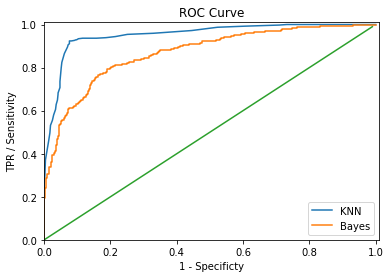

In [91]:
df_knn = pd.DataFrame(dict(fpr=fpr_log_knn, tpr=tpr_log_knn, thr = thr_log_knn))
plt.plot(df_knn['fpr'],df_knn['tpr'], label='KNN')

df_bayes = pd.DataFrame(dict(fpr=fpr_log_bayes, tpr=tpr_log_bayes, thr = thr_log_bayes))
plt.plot(df_bayes['fpr'],df_bayes['tpr'], label='Bayes')

plt.axis([0, 1.01, 0, 1.01]); plt.legend()
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Referencias y Material Adicional

---

<a href="https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#module-sklearn.metrics" target="_blank">Scikit-learn: metrics</a>

<a href="https://towardsdatascience.com/classification-metrics-thresholds-explained-caff18ad2747" target="_blank">Classification metrics thresholds explained</a>

<a href="https://albertum.medium.com/short-introduction-to-roc-curve-ed137062672f" target="_blank">Short introduction to ROC curve</a>

<a href="https://medium.com/analytics-vidhya/understanding-roc-and-auc-metrics-in-classification-tasks-e5e7594cd6b" target="_blank">Understanding ROC and AUC metrics in classification tasks</a>

<a href="https://en.wikipedia.org/wiki/Hyperparameter_optimization" target="_blank">Hyperparameter optimization</a>

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank">Scikit-learn: Grid Search</a>

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html" target="_blank">Scikit-learn: Random Search</a>

<a href="https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search" target="_blank">Intro to Model Tuning: Grid and Random Search</a>